<h1 align="center"> <b> OPTIMIZATION OF THE STEAM BOILER OPERATION </b></h1> 
<h2 align="center"> BUENCAFÉ LIOFILIZADO DE COLOMBIA </h2>
<h3 align="center"> <b>TEAM #84</b> </h3>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pyXSteam.XSteam import XSteam

In [2]:
df = pd.read_csv("data/sept_imp_KNN.csv", parse_dates=["Time"])

In [3]:
df.head(1)

,Time,Screw Speed,Gas Flow Rate,Steam Flow Rate,Steam Pressure,Oven-Home Temperature,Water Temperature,Oxygen_pct,Oven-Home Pressure,Combustion Air Pressure,Temperature before prear,Temperature after prear,Burner Position,Burner_pct,Borra Flow Rate,Cisco Flow Rate
0,2020-10-01,32.78,489.594694,27705.09494,16.412132,764.975167,99.422144,10.921662,-7.767361,101.250011,233.077615,171.093059,33.795459,32.907722,98038.0,18972.6


In [4]:
df.columns

Index(['Time', 'Screw Speed', 'Gas Flow Rate', 'Steam Flow Rate',
       'Steam Pressure', 'Oven-Home Temperature', 'Water Temperature',
       'Oxygen_pct', 'Oven-Home Pressure', 'Combustion Air Pressure',
       'Temperature before prear', 'Temperature after prear',
       'Burner Position', 'Burner_pct', 'Borra Flow Rate', 'Cisco Flow Rate'],
      dtype='object')

In [5]:
original = ['Screw Speed', 'Gas Flow Rate', 'Steam Flow Rate', 'Steam Pressure', 'Oven-Home Temperature', 'Water Temperature', 'Oxygen_pct', 'Oven-Home Pressure', 'Combustion Air Pressure', 'Temperature before prear', 'Temperature after prear', 'Burner Position', 'Burner_pct', 'Borra Flow Rate', 'Cisco Flow Rate']

In [6]:
df.set_index("Time", inplace=True)

In [7]:
df_hourly = df[original].resample("H").mean()

In [8]:
df_daily = df[original].resample("D").mean()

Eliminate data to data that have a value out of itself range

In [9]:
df.isna().sum()/df.shape[0]*100

Screw Speed                 0.0
Gas Flow Rate               0.0
Steam Flow Rate             0.0
Steam Pressure              0.0
Oven-Home Temperature       0.0
Water Temperature           0.0
Oxygen_pct                  0.0
Oven-Home Pressure          0.0
Combustion Air Pressure     0.0
Temperature before prear    0.0
Temperature after prear     0.0
Burner Position             0.0
Burner_pct                  0.0
Borra Flow Rate             0.0
Cisco Flow Rate             0.0
dtype: float64

In [10]:
df.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Screw Speed,393120.00,26.36,10.26,0.00,24.04,32.78,32.78,33.76
Gas Flow Rate,393120.00,538.85,260.17,0.01,400.87,495.49,711.40,1122.23
Steam Flow Rate,393120.00,24362.04,8102.04,0.00,23424.87,26600.20,28933.35,38155.05
Steam Pressure,393120.00,15.80,4.13,0.03,16.09,16.67,17.43,21.42
Oven-Home Temperature,393120.00,696.53,191.72,24.01,713.39,750.39,778.94,992.38
Water Temperature,393120.00,95.68,18.14,24.01,96.41,101.63,104.08,119.99
Oxygen_pct,393120.00,12.85,1.82,0.05,11.75,12.93,13.95,26.26
Oven-Home Pressure,393120.00,-8.21,4.08,-24.99,-10.31,-8.32,-6.45,18.03
Combustion Air Pressure,393120.00,99.60,23.81,0.00,104.06,105.04,105.96,147.27
Temperature before prear,393120.00,229.92,50.61,24.00,239.40,244.40,248.05,267.88


In [11]:
df_hourly.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Screw Speed,6552.00,26.36,9.22,0.00,23.58,30.26,32.78,33.76
Gas Flow Rate,6552.00,538.85,199.70,10.91,428.71,517.53,660.62,1080.30
Steam Flow Rate,6552.00,24362.04,7787.99,0.00,24017.95,26762.26,28634.45,32793.71
Steam Pressure,6552.00,15.80,4.07,0.04,16.29,16.74,17.32,19.99
Oven-Home Temperature,6552.00,696.53,188.87,24.05,724.09,754.28,772.53,855.18
Water Temperature,6552.00,95.68,17.79,24.02,97.92,101.59,103.27,119.88
Oxygen_pct,6552.00,12.85,1.43,8.75,11.80,12.83,13.63,21.20
Oven-Home Pressure,6552.00,-8.21,2.20,-18.63,-9.65,-8.05,-7.95,4.01
Combustion Air Pressure,6552.00,99.60,23.35,0.01,104.92,104.99,105.04,111.78
Temperature before prear,6552.00,229.92,50.50,24.08,240.09,244.60,247.54,255.23


In [12]:
df_daily.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Screw Speed,273.00,26.36,8.29,0.00,23.53,29.85,32.07,33.76
Gas Flow Rate,273.00,538.85,169.83,48.96,443.30,529.67,636.96,983.03
Steam Flow Rate,273.00,24362.04,7194.14,0.00,24574.62,26701.25,28194.75,30590.11
Steam Pressure,273.00,15.80,3.77,0.04,16.48,16.82,17.20,18.41
Oven-Home Temperature,273.00,696.53,177.74,24.95,722.20,754.04,769.37,816.39
Water Temperature,273.00,95.68,16.26,24.29,97.17,101.31,102.71,107.30
Oxygen_pct,273.00,12.85,1.30,9.48,11.84,12.78,13.53,17.00
Oven-Home Pressure,273.00,-8.21,1.95,-15.59,-9.57,-8.00,-7.97,0.47
Combustion Air Pressure,273.00,99.60,20.79,0.14,104.61,104.99,105.00,110.02
Temperature before prear,273.00,229.92,47.95,26.70,240.56,244.30,247.32,251.81


In [13]:
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS) #m/kg/sec/°C/bar/W
#df["Saturated liquid enthalpy"] = df["Water Temperature"].apply(steamTable.hL_t)
#df["Saturated vapor enthalpy"] = df["Steam Pressure"].apply(steamTable.hV_p)
#df["Saturation temperature"] = df["Steam Pressure"].apply(steamTable.tsat_p)

In [14]:
df_hourly["Saturated liquid enthalpy"] = df_hourly["Water Temperature"].apply(steamTable.hL_t)
df_hourly["Saturated vapor enthalpy"] = df_hourly["Steam Pressure"].apply(steamTable.hV_p)
df_hourly["Saturation temperature"] = df_hourly["Steam Pressure"].apply(steamTable.tsat_p)

In [15]:
df_daily["Saturated liquid enthalpy"] = df_daily["Water Temperature"].apply(steamTable.hL_t)
df_daily["Saturated vapor enthalpy"] = df_daily["Steam Pressure"].apply(steamTable.hV_p)
df_daily["Saturation temperature"] = df_daily["Steam Pressure"].apply(steamTable.tsat_p)

In [16]:
#df["Date"] = df.index.date
df_hourly["Date"] = df_hourly.index.date
df_daily["Date"] = df_daily.index.date

In [17]:
#Next code impute borra and cisco rate flow each minute in Kg/h consumption and for this case is directly proportional to the Screw Speed
#df_new = pd.DataFrame()

#for i in list(np.unique(df["Date"].to_numpy())):
#    df_partial = df.loc[str(i)].reset_index()
#    #consumo_borra = df_partial["Borra Flow Rate (Kg/d)"][0]
#    #consumo_cisco = df_partial["Cisco Flow Rate (Kg/d)"][0]
#    df_partial["Borra Flow Rate_kgh"] = df_partial.apply(lambda row: row["Screw Speed"]/df_partial["Screw Speed"].sum()*row["Borra Flow Rate"]*60 if df_partial["Screw Speed"].sum() > 0 else row["Borra Flow Rate"]/24, axis= 1)
#    #*consumo_borra
#    df_partial["Cisco Flow Rate_kgh"] = df_partial.apply(lambda row: row["Screw Speed"]/df_partial["Screw Speed"].sum()*row["Cisco Flow Rate"]*60 if df_partial["Screw Speed"].sum() > 0 else row["Cisco Flow Rate"]/24, axis= 1) 
#    #*consumo_cisco
#    df_new = df_new.append(df_partial)

In [18]:
df_hourly2 = pd.DataFrame()

for i in list(np.unique(df_hourly["Date"].to_numpy())):
    df_partial = df_hourly.loc[str(i)].reset_index()
    #consumo_borra = df_partial["Borra Flow Rate (Kg/d)"][0]
    #consumo_cisco = df_partial["Cisco Flow Rate (Kg/d)"][0]
    df_partial["Borra Flow Rate_kgh"] = df_partial.apply(lambda row: row["Screw Speed"]/df_partial["Screw Speed"].sum()*row["Borra Flow Rate"] if df_partial["Screw Speed"].sum() > 0 else row["Borra Flow Rate"]/24, axis= 1)
    #*consumo_borra
    df_partial["Cisco Flow Rate_kgh"] = df_partial.apply(lambda row: row["Screw Speed"]/df_partial["Screw Speed"].sum()*row["Cisco Flow Rate"] if df_partial["Screw Speed"].sum() > 0 else row["Cisco Flow Rate"]/24, axis= 1) 
    #*consumo_cisco
    df_hourly2 = df_hourly2.append(df_partial)

In [19]:
df_daily["Borra Flow Rate_kgh"] = df_daily.apply(lambda row: row["Borra Flow Rate"]/24 , axis= 1)
df_daily["Cisco Flow Rate_kgh"] = df_daily.apply(lambda row: row["Cisco Flow Rate"]/24, axis= 1)

In [20]:
#df_new.drop(columns=["Date"], inplace=True)
df_hourly2.drop(columns=["Date"], inplace=True)
df_daily.drop(columns=["Date"], inplace=True)

In [21]:
#df_new.head(1)

In [22]:
df_daily.head(1)

,Screw Speed,Gas Flow Rate,Steam Flow Rate,Steam Pressure,Oven-Home Temperature,Water Temperature,Oxygen_pct,Oven-Home Pressure,Combustion Air Pressure,Temperature before prear,Temperature after prear,Burner Position,Burner_pct,Borra Flow Rate,Cisco Flow Rate,Saturated liquid enthalpy,Saturated vapor enthalpy,Saturation temperature,Borra Flow Rate_kgh,Cisco Flow Rate_kgh
Time,,,,,,,,,,,,,,,,,,,,
2020-10-01,32.771085,530.203761,28601.998925,16.349775,782.910416,93.814536,11.083038,-8.030347,104.751399,236.164569,175.389388,37.468243,37.545316,98038.0,18972.6,393.025058,2793.481303,202.421227,4084.916667,790.525


In [23]:
df_hourly2.head(1)

,Time,Screw Speed,Gas Flow Rate,Steam Flow Rate,Steam Pressure,Oven-Home Temperature,Water Temperature,Oxygen_pct,Oven-Home Pressure,Combustion Air Pressure,...,Temperature after prear,Burner Position,Burner_pct,Borra Flow Rate,Cisco Flow Rate,Saturated liquid enthalpy,Saturated vapor enthalpy,Saturation temperature,Borra Flow Rate_kgh,Cisco Flow Rate_kgh
0,2020-10-01,32.78,492.454277,28834.893951,16.707083,797.047013,97.896202,10.223429,-8.138485,101.424094,...,170.034112,34.043682,33.951123,98038.0,18972.6,410.225386,2794.068627,203.468818,4086.027916,790.740052


In [24]:
ng_df = pd.read_csv('gas_natural.csv')
ng_df["Time"] = pd.to_datetime(ng_df["Fecha"])
ng_df.drop(columns=["Fecha"], inplace=True)
ng_df.head(2)

,PC (BTU/PC),Time
0,1141.88,2021-03-07
1,1147.02,2021-03-08


In [25]:
#df_new = df_new.set_index(["Time"]).join(ng_df.set_index("Time"))
df_hourly2 = df_hourly2.set_index(["Time"]).join(ng_df.set_index("Time"))
df_daily = df_daily.join(ng_df.set_index("Time"))

In [26]:
#df_new["PC (BTU/PC)"] = df_new["PC (BTU/PC)"].fillna(method='ffill')
#Fill missing data per minute with the data of heat of combustion of that day
#mean_pcgas = df_new["PC (BTU/PC)"].mean()
#Data without a heat of combustion value will be fill it with the mean of the dataset of heat of combustion from 7th March to 30th June
#df_new["PC (BTU/PC)"] = df_new["PC (BTU/PC)"].fillna(value=mean_pcgas)

In [27]:
df_hourly2["PC (BTU/PC)"] = df_hourly2["PC (BTU/PC)"].fillna(method='ffill')
#Fill missing data per minute with the data of heat of combustion of that day
mean_pcgas = df_hourly2["PC (BTU/PC)"].mean()
#Data without a heat of combustion value will be fill it with the mean of the dataset of heat of combustion from 7th March to 30th June
df_hourly2["PC (BTU/PC)"] = df_hourly2["PC (BTU/PC)"].fillna(value=mean_pcgas)

In [28]:
df_daily["PC (BTU/PC)"] = df_daily["PC (BTU/PC)"].fillna(method='ffill')
#Fill missing data per minute with the data of heat of combustion of that day
mean_pcgas = df_daily["PC (BTU/PC)"].mean()
#Data without a heat of combustion value will be fill it with the mean of the dataset of heat of combustion from 7th March to 30th June
df_daily["PC (BTU/PC)"] = df_daily["PC (BTU/PC)"].fillna(value=mean_pcgas)

In [29]:
#df_new["Heat of Comb_GN"] = df_new["PC (BTU/PC)"] * 37.2589
#df_new.drop(columns=["PC (BTU/PC)"], inplace=True)

In [30]:
df_hourly2["Heat of Comb_GN"] = df_hourly2["PC (BTU/PC)"] * 37.2589
df_hourly2.drop(columns=["PC (BTU/PC)"], inplace=True)

df_daily["Heat of Comb_GN"] = df_daily["PC (BTU/PC)"] * 37.2589
df_daily.drop(columns=["PC (BTU/PC)"], inplace=True)

In [31]:
#df_new.columns

In [32]:
df_hourly2.columns

Index(['Screw Speed', 'Gas Flow Rate', 'Steam Flow Rate', 'Steam Pressure',
       'Oven-Home Temperature', 'Water Temperature', 'Oxygen_pct',
       'Oven-Home Pressure', 'Combustion Air Pressure',
       'Temperature before prear', 'Temperature after prear',
       'Burner Position', 'Burner_pct', 'Borra Flow Rate', 'Cisco Flow Rate',
       'Saturated liquid enthalpy', 'Saturated vapor enthalpy',
       'Saturation temperature', 'Borra Flow Rate_kgh', 'Cisco Flow Rate_kgh',
       'Heat of Comb_GN'],
      dtype='object')

In [33]:
df_daily.columns

Index(['Screw Speed', 'Gas Flow Rate', 'Steam Flow Rate', 'Steam Pressure',
       'Oven-Home Temperature', 'Water Temperature', 'Oxygen_pct',
       'Oven-Home Pressure', 'Combustion Air Pressure',
       'Temperature before prear', 'Temperature after prear',
       'Burner Position', 'Burner_pct', 'Borra Flow Rate', 'Cisco Flow Rate',
       'Saturated liquid enthalpy', 'Saturated vapor enthalpy',
       'Saturation temperature', 'Borra Flow Rate_kgh', 'Cisco Flow Rate_kgh',
       'Heat of Comb_GN'],
      dtype='object')

In [34]:
#df_new["Steam Energy"] = df_new["Steam Flow Rate"] * (df_new["Saturated vapor enthalpy"] - df_new['Saturated liquid enthalpy'])

#df_new["Fuel Energy"] = df_new["Gas Flow Rate"] * df_new["Heat of Comb_GN"] + df_new['Borra Flow Rate_kgh']*12782 + df_new['Cisco Flow Rate_kgh']*16113

#df_new["Efficiency"] = df_new.apply(lambda row: row["Steam Energy"]/row["Fuel Energy"] if row["Fuel Energy"] > 0 else 0, axis=1)

In [35]:
df_hourly2["Steam Energy"] = df_hourly2["Steam Flow Rate"] * (df_hourly2["Saturated vapor enthalpy"] - df_hourly2['Saturated liquid enthalpy'])

df_hourly2["Fuel Energy"] = df_hourly2["Gas Flow Rate"] * df_hourly2["Heat of Comb_GN"] + df_hourly2['Borra Flow Rate_kgh']*12782 + df_hourly2['Cisco Flow Rate_kgh']*16113

df_hourly2["Efficiency"] = df_hourly2.apply(lambda row: row["Steam Energy"]/row["Fuel Energy"] if row["Fuel Energy"] > 0 else 0, axis=1)

In [36]:
df_daily["Steam Energy"] = df_daily["Steam Flow Rate"] * (df_daily["Saturated vapor enthalpy"] - df_daily['Saturated liquid enthalpy'])

df_daily["Fuel Energy"] = df_daily["Gas Flow Rate"] * df_daily["Heat of Comb_GN"] + df_daily['Borra Flow Rate_kgh']*12782 + df_daily['Cisco Flow Rate_kgh']*16113

df_daily["Efficiency"] = df_daily.apply(lambda row: row["Steam Energy"]/row["Fuel Energy"] if row["Fuel Energy"] > 0 else 0, axis=1)

In [37]:
df_hourly2["Borra Flow Rate_kgh"] = df_hourly2["Borra Flow Rate_kgh"].apply(lambda x: x if x < 15000 else np.nan)
df_hourly2 = df_hourly2.interpolate()

In [38]:
df_daily["Borra Flow Rate_kgh"] = df_daily["Borra Flow Rate_kgh"].apply(lambda x: x if x < 15000 else np.nan)
df_daily = df_daily.interpolate()

In [39]:
df_hourly2["Steam Energy"] = df_hourly2["Steam Flow Rate"] * (df_hourly2["Saturated vapor enthalpy"] - df_hourly2['Saturated liquid enthalpy'])

df_hourly2["Fuel Energy"] = df_hourly2["Gas Flow Rate"] * df_hourly2["Heat of Comb_GN"] + df_hourly2['Borra Flow Rate_kgh']*12782 + df_hourly2['Cisco Flow Rate_kgh']*16113

df_hourly2["Efficiency"] = df_hourly2.apply(lambda row: row["Steam Energy"]/row["Fuel Energy"] if row["Fuel Energy"] > 0 else 0, axis=1)

In [40]:
df_daily["Steam Energy"] = df_daily["Steam Flow Rate"] * (df_daily["Saturated vapor enthalpy"] - df_daily['Saturated liquid enthalpy'])

df_daily["Fuel Energy"] = df_daily["Gas Flow Rate"] * df_daily["Heat of Comb_GN"] + df_daily['Borra Flow Rate_kgh']*12782 + df_daily['Cisco Flow Rate_kgh']*16113

df_daily["Efficiency"] = df_daily.apply(lambda row: row["Steam Energy"]/row["Fuel Energy"] if row["Fuel Energy"] > 0 else 0, axis=1)

In [41]:
#df_new.dropna(inplace=True)

In [42]:
#df_new.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

In [43]:
df_hourly2.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Screw Speed,6552.00,26.36,9.22,0.00,23.58,30.26,32.78,33.76
Gas Flow Rate,6552.00,538.85,199.70,10.91,428.71,517.53,660.62,1080.30
Steam Flow Rate,6552.00,24362.04,7787.99,0.00,24017.95,26762.26,28634.45,32793.71
Steam Pressure,6552.00,15.80,4.07,0.04,16.29,16.74,17.32,19.99
Oven-Home Temperature,6552.00,696.53,188.87,24.05,724.09,754.28,772.53,855.18
Water Temperature,6552.00,95.68,17.79,24.02,97.92,101.59,103.27,119.88
Oxygen_pct,6552.00,12.85,1.43,8.75,11.80,12.83,13.63,21.20
Oven-Home Pressure,6552.00,-8.21,2.20,-18.63,-9.65,-8.05,-7.95,4.01
Combustion Air Pressure,6552.00,99.60,23.35,0.01,104.92,104.99,105.04,111.78
Temperature before prear,6552.00,229.92,50.50,24.08,240.09,244.60,247.54,255.23


In [44]:
df_daily.describe().transpose().apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Screw Speed,273.00,26.36,8.29,0.00,23.53,29.85,32.07,33.76
Gas Flow Rate,273.00,538.85,169.83,48.96,443.30,529.67,636.96,983.03
Steam Flow Rate,273.00,24362.04,7194.14,0.00,24574.62,26701.25,28194.75,30590.11
Steam Pressure,273.00,15.80,3.77,0.04,16.48,16.82,17.20,18.41
Oven-Home Temperature,273.00,696.53,177.74,24.95,722.20,754.04,769.37,816.39
Water Temperature,273.00,95.68,16.26,24.29,97.17,101.31,102.71,107.30
Oxygen_pct,273.00,12.85,1.30,9.48,11.84,12.78,13.53,17.00
Oven-Home Pressure,273.00,-8.21,1.95,-15.59,-9.57,-8.00,-7.97,0.47
Combustion Air Pressure,273.00,99.60,20.79,0.14,104.61,104.99,105.00,110.02
Temperature before prear,273.00,229.92,47.95,26.70,240.56,244.30,247.32,251.81


In [45]:
df_daily["Fossile CO2"] = df_daily["Gas Flow Rate"] * 0.657 * 46 / 14

In [46]:
df_daily["Biomass CO2"] = (df_daily["Borra Flow Rate_kgh"] * 0.5157 * 0.35 + df_daily["Cisco Flow Rate_kgh"] * 0.5113 * 0.75) * 46/14

In [47]:
df_daily["Fossile Trees"] = df_daily["Fossile CO2"] / 3.67

In [48]:
df_daily["Biomass Trees"] = df_daily["Biomass CO2"] / 3.67

<AxesSubplot:xlabel='Time'>

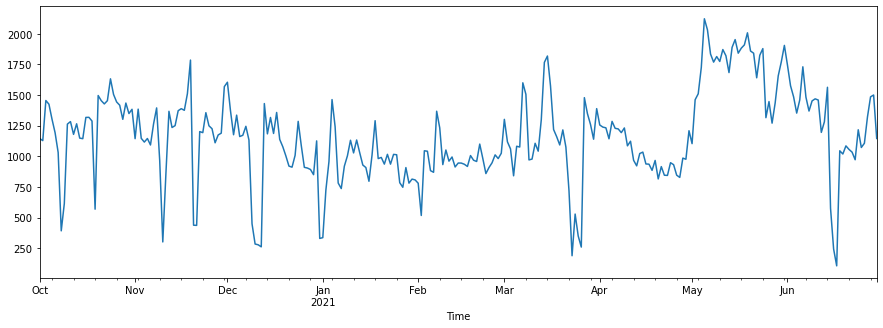

In [49]:
df_daily["Fossile CO2"].plot(figsize=(15,5))
#df_daily["Fossile CO2"].rolling(7).mean().plot(figsize=(15,5))

<AxesSubplot:xlabel='Time'>

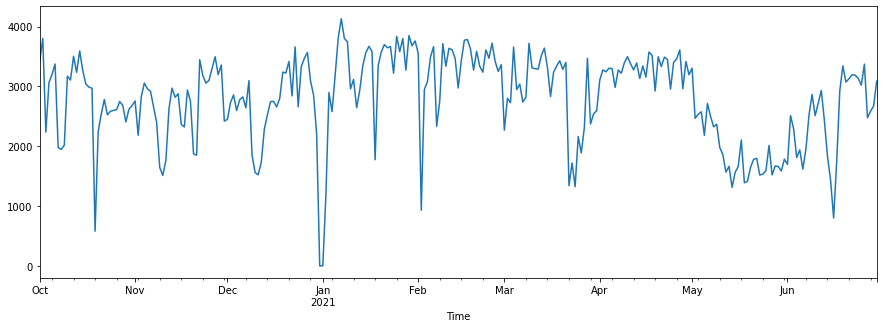

In [50]:
df_daily["Biomass CO2"].plot(figsize=(15,5))
#df_daily["Biomass CO2"].rolling(7).mean().plot(figsize=(15,5))

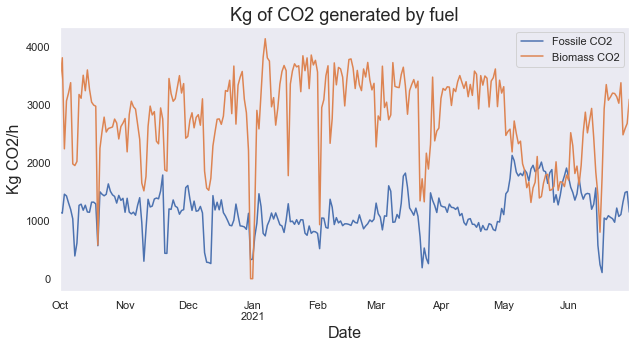

In [88]:
df_daily["Fossile CO2"].plot(figsize=(9,5))
df_daily["Biomass CO2"].plot(figsize=(9,5))
plt.title("Kg of CO2 generated by fuel", fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Kg CO2/h", fontsize=16)
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.legend(["Fossile CO2", "Biomass CO2"])
plt.savefig("co2.png")

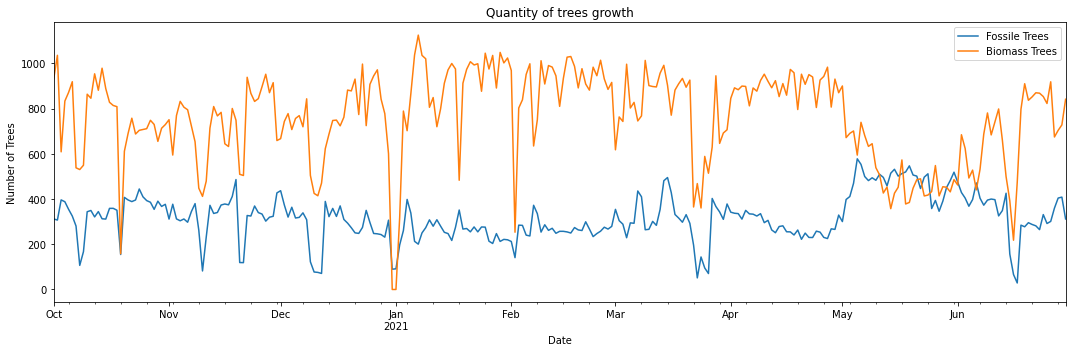

In [52]:
df_daily["Fossile Trees"].plot(figsize=(15,5))
df_daily["Biomass Trees"].plot(figsize=(15,5))

plt.title("Quantity of trees growth")
plt.xlabel("Date")
plt.ylabel("Number of Trees")
plt.tight_layout()
plt.legend(["Fossile Trees", "Biomass Trees"])
plt.savefig("trees.png")

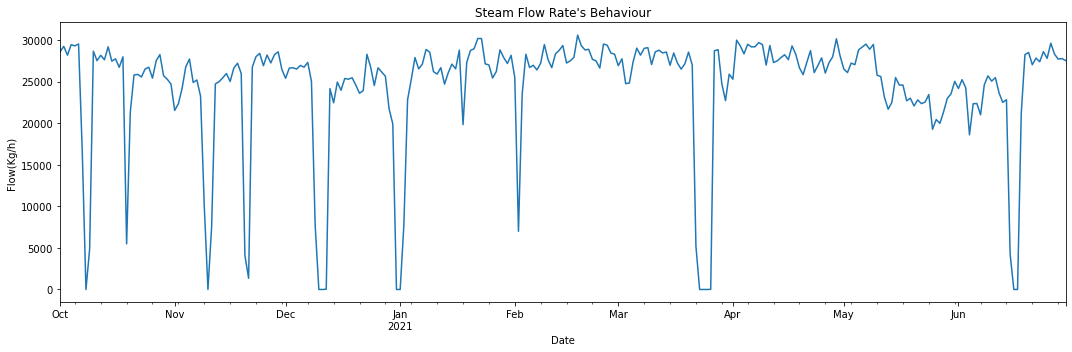

In [53]:
df_daily["Steam Flow Rate"].plot(figsize=(15,5))
#df_daily["Efficiency"].rolling(7).mean().plot(figsize=(15,5))
plt.title("Steam Flow Rate's Behaviour")
plt.xlabel("Date")
plt.ylabel("Flow(Kg/h)")
plt.tight_layout()
plt.savefig("steam_ts.png")

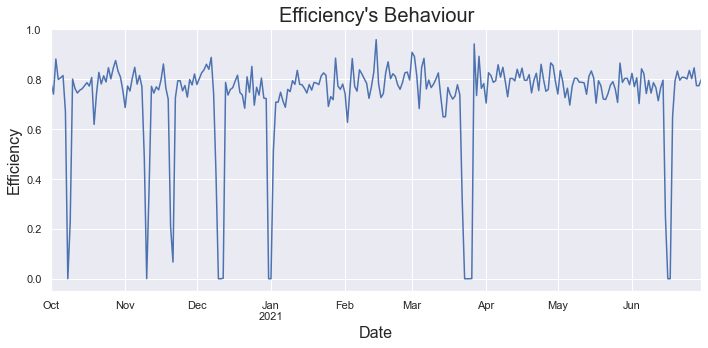

In [89]:
df_daily["Efficiency"].plot(figsize=(10,5))
#df_daily["Efficiency"].rolling(7).mean().plot(figsize=(15,5))
plt.title("Efficiency's Behaviour", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Efficiency", fontsize=16)
plt.grid
plt.tight_layout()
plt.savefig("efficiency.png")

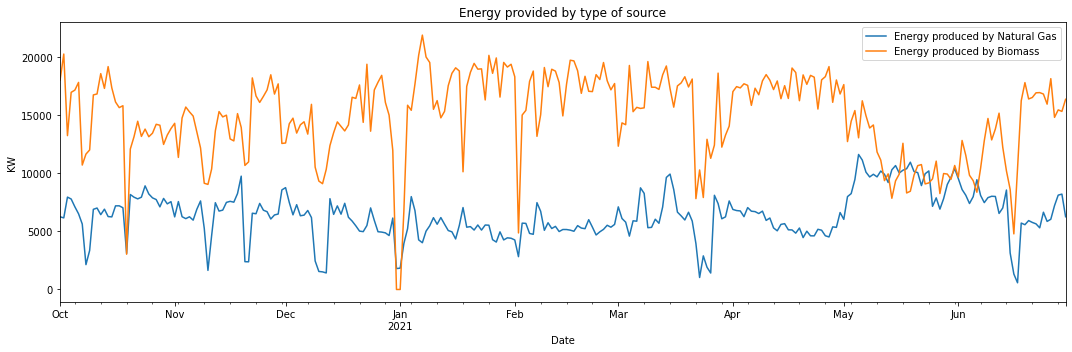

In [55]:
(df_daily["Gas Flow Rate"] * df_daily["Heat of Comb_GN"] * 0.000278).plot(figsize=(15,5))
(df_daily['Borra Flow Rate_kgh']*12782* 0.000278 + df_daily['Cisco Flow Rate_kgh']*16113* 0.000278).plot(figsize=(15,5))
plt.title("Energy provided by type of source")
plt.xlabel("Date")
plt.ylabel("KW")
plt.legend(["Energy produced by Natural Gas", "Energy produced by Biomass"])
plt.tight_layout()
plt.savefig("energy_fuel.png")

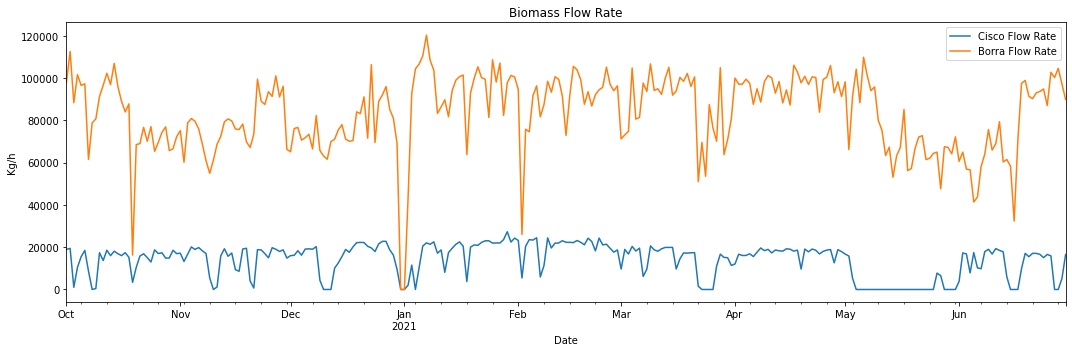

In [56]:
(df_daily["Cisco Flow Rate"]).plot(figsize=(15,5))
(df_daily["Borra Flow Rate"]).plot(figsize=(15,5))
plt.title("Biomass Flow Rate")
plt.xlabel("Date")
plt.ylabel("Kg/h")
plt.legend(["Cisco Flow Rate", "Borra Flow Rate"])
plt.tight_layout()
plt.savefig("biomass_ts.png")

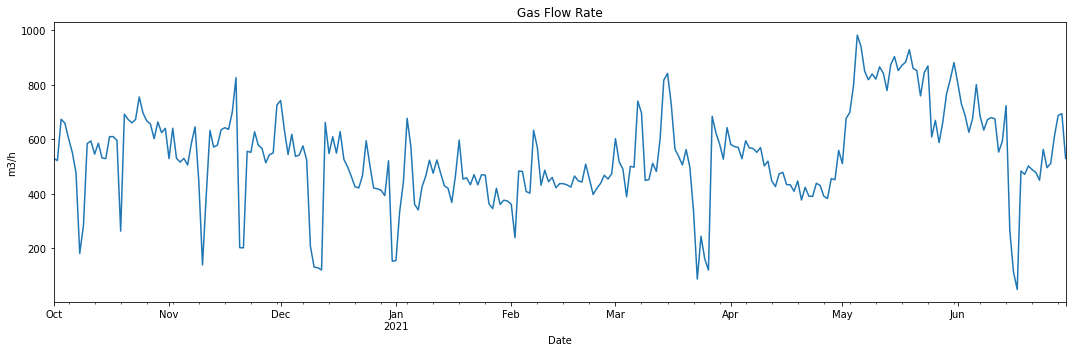

In [57]:
(df_daily["Gas Flow Rate"]).plot(figsize=(15,5))

plt.title("Gas Flow Rate")
plt.xlabel("Date")
plt.ylabel("m3/h")

plt.tight_layout()
plt.savefig("gas_ts.png")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


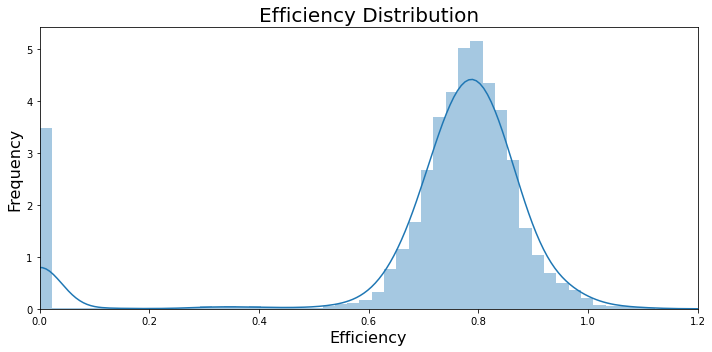

In [81]:
plt.figure(figsize=(10,5))
sns.distplot(df_hourly2[df_hourly2["Efficiency"] < 1.2]["Efficiency"])
#df_hourly2["Efficiency"].plot(kind="hist", bins=50, figsize=(15,5))

plt.title("Efficiency Distribution", fontsize=20)
plt.xlabel("Efficiency", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xlim(-0.0, 1.2)

plt.tight_layout()
plt.savefig("efficiency_hist.png")

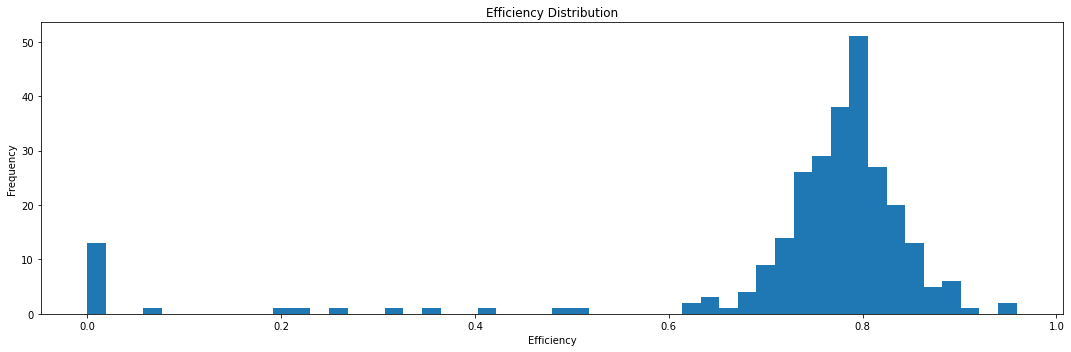

In [59]:
df_daily["Efficiency"].plot(kind="hist", bins=50, figsize=(15,5))

plt.title("Efficiency Distribution")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("efficiency_hist_day.png")

In [60]:
#(df_new["Efficiency"]>1).sum()/df_new.shape[0]*100

In [61]:
#(df_new["Efficiency"]<0.5).sum()/df_new.shape[0]*100

In [62]:
#df_new.to_csv("data/prueba_KNN_sept.csv")

In [63]:
#df_hourly2.to_csv("data/prueba_KNN_hourly.csv")

In [64]:
#df_daily.to_csv("data/prueba_KNN_daily.csv")

In [65]:
#plt.figure(figsize=(10, 10))
#sns.heatmap(df_new.corr())

<AxesSubplot:>

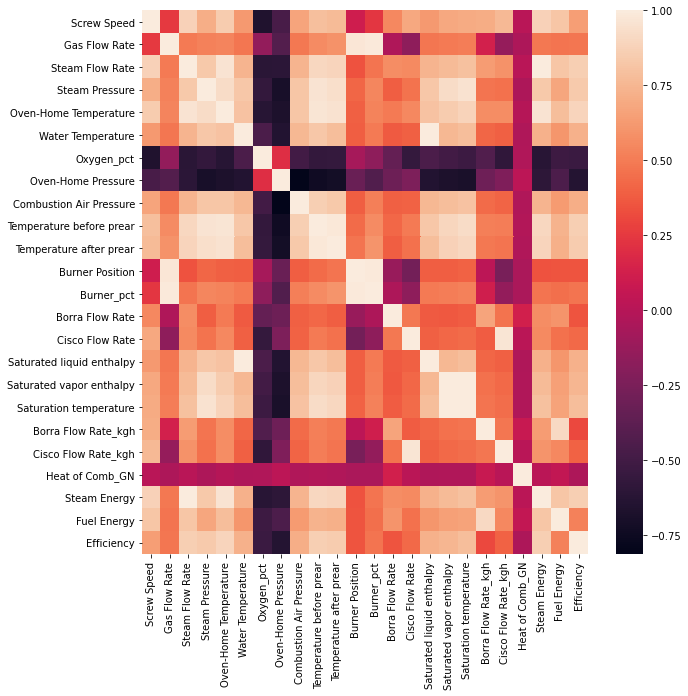

In [66]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_hourly2.corr())

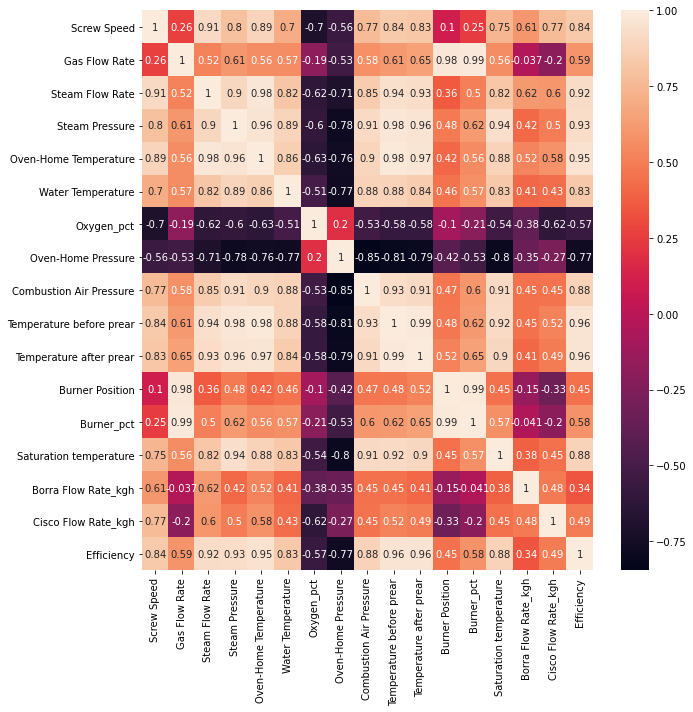

In [67]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_daily.drop(["Borra Flow Rate", "Cisco Flow Rate", "Saturated liquid enthalpy", "Saturated vapor enthalpy", "Heat of Comb_GN", "Steam Energy", "Fuel Energy", "Fossile CO2", "Biomass CO2", "Fossile Trees", "Biomass Trees"], axis=1).corr(), annot=True)
plt.tight_layout()
plt.savefig("heatmap_corr.png")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=624a33d5-a29f-4e4f-876a-50fb81cef883' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>